# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [2]:
# 한글 찍기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [5]:
df = pd.read_csv('../data/auto-mpg.csv')

In [4]:
# 1. nan 확인

In [6]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [7]:
# X, y 로 분리

In [10]:
y = df['mpg']

In [13]:
X = df.loc[ : , 'cyl' : 'origin' ]

In [14]:
X

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
from sklearn.compose import ColumnTransformer

In [18]:
ct = ColumnTransformer( [('encoder', OneHotEncoder(), [6])] , remainder='passthrough' )

In [20]:
X = ct.fit_transform(X)

In [21]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [22]:
# training / test 로 분리

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [26]:
# 모델링

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
# MSE 

In [35]:
((y_test - y_pred) ** 2).mean()

11.882268558597172

In [38]:
df_test = y_test.to_frame()

In [40]:
df_test['y_pred'] = y_pred

In [44]:
df_test.reset_index(drop= True , inplace=True )

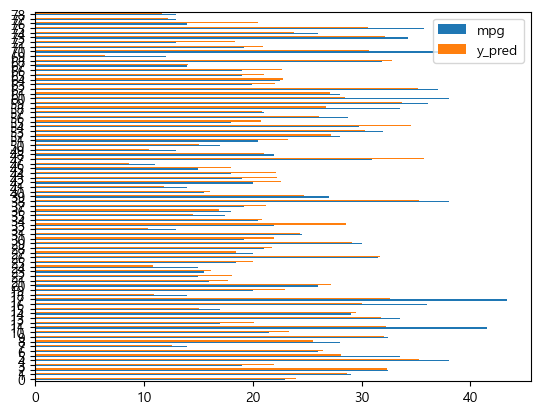

In [51]:
df_test.plot(kind='barh')
plt.show()

In [52]:
# 새로운 차가 나왔습니다. 이 차의 연비를 예측하세요
# displ 301, hp 133 , cyl 8, weight 2900, accel 10.7,  yr 81, origin 유럽차

In [57]:
new_data = [ 8,  301, 133, 2900, 10.7, 81, 2] 

In [61]:
new_data = np.array(new_data).reshape(1, 7)

In [62]:
new_data

array([[8.00e+00, 3.01e+02, 1.33e+02, 2.90e+03, 1.07e+01, 8.10e+01,
        2.00e+00]])

In [66]:
new_data = ct.transform(new_data)

C:\Users\405\anaconda3\envs\base2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [67]:
new_data

array([[0.00e+00, 1.00e+00, 0.00e+00, 8.00e+00, 3.01e+02, 1.33e+02,
        2.90e+03, 1.07e+01, 8.10e+01]])

In [68]:
regressor.predict(new_data)

array([30.17837904])

In [69]:
import joblib

In [70]:
joblib.dump(ct, 'ct.pkl')

['ct.pkl']

In [71]:
joblib.dump( regressor , 'regressor.pkl' )

['regressor.pkl']